<Font size='4'>**Importing required libraries**</Font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

<Font size='4'>**Reading CSV Files**</Font>

In [31]:
pd.__version__

'2.2.2'

In [2]:
df=pd.read_csv('./space_missions.csv',encoding_errors='ignore')
df

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success


<font size='4'>**Recommended Analysis**</font>

<font size='2'>
    
How have rocket launches trended across time? Has mission success rate increased?

Which countries have had the most successful space missions? Has it always been that way?

Which rocket has been used for the most space missions? Is it still active?

Are there any patterns you can notice with the launch locations?
</font>

In [3]:
#chacking for null  values present in dataset or not
df[df.isnull().any(axis=1)]

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
4605,KARI,"LC-2, Naro Space Center, South Korea",2022-06-21,07:00:00,KSLV-2,Test Flight 2,Active,NaN,Success
4610,Rocket Lab,"Rocket Lab LC-1B, Māhia Peninsula, New Zealand",2022-06-28,09:55:00,Electron/Photon,CAPSTONE,Active,NaN,Success
4621,ESA,"ELV-1, Guiana Space Centre, French Guiana, France",2022-07-13,13:13:00,Vega C,LARES 2 & Cubesats,Active,NaN,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,NaN,Success


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [5]:
df[df['Time'].isnull()]

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
13,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...",1958-07-25,NaN,NOTS-EV-1 Pilot II,Pilot-1 (D1),Retired,NaN,Failure
15,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...",1958-08-12,NaN,NOTS-EV-1 Pilot II,Pilot-2 (D2),Retired,NaN,Failure
17,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...",1958-08-22,NaN,NOTS-EV-1 Pilot II,Pilot-3 (D3),Retired,NaN,Failure
19,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...",1958-08-25,NaN,NOTS-EV-1 Pilot II,Pilot-4 (R1),Retired,NaN,Failure
20,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...",1958-08-26,NaN,NOTS-EV-1 Pilot II,Pilot-5 (R2),Retired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
3988,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...",2017-07-27,NaN,Simorgh,Test Flight,Active,NaN,Failure
4029,Blue Origin,"Blue Origin Launch Site, West Texas, Texas, USA",2017-12-17,NaN,New Shepard,NS-7,Active,NaN,Success
4161,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...",2019-02-05,NaN,Safir-1B+,Dousti,Active,NaN,Failure
4217,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...",2019-08-29,NaN,Safir-1B+,Nahid-1,Active,NaN,Prelaunch Failure


In [6]:
df.isna().sum()

Company             0
Location            0
Date                0
Time              127
Rocket              0
Mission             0
RocketStatus        0
Price            3365
MissionStatus       0
dtype: int64

In [7]:
#converting price column in int datatype
df['Price']=pd.to_numeric(df['Price'].str.replace(',',' '),errors='coerce')
df['Price']=df['Price'].astype(float)

#fill missing value with avg of price
df['Price']=df['Price'].fillna(df['Price'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        4630 non-null   object 
 1   Location       4630 non-null   object 
 2   Date           4630 non-null   object 
 3   Time           4503 non-null   object 
 4   Rocket         4630 non-null   object 
 5   Mission        4630 non-null   object 
 6   RocketStatus   4630 non-null   object 
 7   Price          4630 non-null   float64
 8   MissionStatus  4630 non-null   object 
dtypes: float64(1), object(8)
memory usage: 325.7+ KB


In [8]:
df.isna().sum()

Company            0
Location           0
Date               0
Time             127
Rocket             0
Mission            0
RocketStatus       0
Price              0
MissionStatus      0
dtype: int64

In [9]:
#removing time column
df.drop(columns=['Time'],axis=0,inplace=True)

In [10]:
df['Date']=pd.to_datetime(df['Date'])
#df.info()

In [11]:
#extracting year from date column
df['MissionYear']=df['Date'].dt.year
df

,Company,Location,Date,Rocket,Mission,RocketStatus,Price,MissionStatus,MissionYear
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,Sputnik 8K71PS,Sputnik-1,Retired,109.77956,Success,1957
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS,Sputnik-2,Retired,109.77956,Success,1957
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard,Vanguard TV3,Retired,109.77956,Failure,1957
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I,Explorer 1,Retired,109.77956,Success,1958
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard,Vanguard TV3BU,Retired,109.77956,Failure,1958
...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,Falcon 9 Block 5,Starlink Group 3-2,Active,67.00000,Success,2022
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,Long March 5B,Wentian,Active,109.77956,Success,2022
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,Falcon 9 Block 5,Starlink Group 4-25,Active,67.00000,Success,2022
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,Zhongke-1A,Demo Flight,Active,109.77956,Success,2022


# Q.1: How have rocket launches trended across time? Has mission success rate increased?<a id=4></a>

<font size='5'>Creating Dataframe that contain Successed Mission Launch Counts Over the yaers</font>

In [9]:
newdf=df[['MissionYear','MissionStatus']]
newdf=newdf.drop(newdf[newdf['MissionStatus'] == 'Failure'].index,axis=0)
newdf=newdf.drop(newdf[newdf['MissionStatus'] == 'Partial Failure'].index,axis=0)
newdf=newdf.drop(newdf[newdf['MissionStatus'] == 'Prelaunch Failure'].index,axis=0)
newdf

,MissionYear,MissionStatus
0,1957,Success
1,1957,Success
3,1958,Success
6,1958,Success
7,1958,Success
...,...,...
4625,2022,Success
4626,2022,Success
4627,2022,Success
4628,2022,Success


In [39]:
print(newdf['MissionStatus'].value_counts())

MissionStatus
Success    4162
Name: count, dtype: int64


In [10]:
newdf=newdf.groupby('MissionYear').value_counts()

#convert Series into Dataframe
newdf=pd.DataFrame(newdf)


In [11]:
#reset index of newdf
newdf.reset_index(inplace=True)

In [12]:
newdf

,MissionYear,MissionStatus,count
0,1957,Success,2
1,1958,Success,6
2,1959,Success,8
3,1960,Success,19
4,1961,Success,32
...,...,...,...
61,2018,Success,113
62,2019,Success,100
63,2020,Success,107
64,2021,Success,143


In [13]:
#rename column name count to Success Count
newdf.rename(columns={'count':'Success Count'},inplace=True)
newdf

,MissionYear,MissionStatus,Success Count
0,1957,Success,2
1,1958,Success,6
2,1959,Success,8
3,1960,Success,19
4,1961,Success,32
...,...,...,...
61,2018,Success,113
62,2019,Success,100
63,2020,Success,107
64,2021,Success,143


<font size='5'>Creating New dataframe contain year wise failure count</font>

In [14]:
failuredf=df[['MissionYear','MissionStatus']]
type(failuredf)

pandas.core.frame.DataFrame

In [15]:
failuredf['MissionStatus'].replace('Prelaunch Failure','Failure',inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5464\2964288626.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  failuredf['MissionStatus'].replace('Prelaunch Failure','Failure',inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5464\2964288626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failuredf['MissionStatus'].replace('Prelau

In [16]:
failuredf['MissionStatus'].replace('Partial Failure','Failure',inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_5464\2836975795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  failuredf['MissionStatus'].replace('Partial Failure','Failure',inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5464\2836975795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failuredf['MissionStatus'].replace('Partial 

In [17]:
failuredf.loc[failuredf['MissionStatus']=='Partial Failure']

,MissionYear,MissionStatus


In [18]:
failuredf.drop(failuredf[failuredf['MissionStatus']=='Success'].index,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5464\1628335844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failuredf.drop(failuredf[failuredf['MissionStatus']=='Success'].index,inplace=True)


In [19]:
failuredf

,MissionYear,MissionStatus
2,1957,Failure
4,1958,Failure
5,1958,Failure
8,1958,Failure
9,1958,Failure
...,...,...
4533,2021,Failure
4536,2021,Failure
4549,2022,Failure
4589,2022,Failure


In [20]:
failuredf=failuredf.groupby('MissionYear').value_counts()
failuredf=pd.DataFrame(failuredf)

In [21]:
failuredf.reset_index(inplace=True)

In [22]:
failuredf.rename(columns={'count':'FailureCount'},inplace=True)

In [23]:
failuredf

,MissionYear,MissionStatus,FailureCount
0,1957,Failure,1
1,1958,Failure,22
2,1959,Failure,12
3,1960,Failure,20
4,1961,Failure,20
...,...,...,...
61,2018,Failure,4
62,2019,Failure,9
63,2020,Failure,12
64,2021,Failure,14


In [24]:
#merge failuredf and newdf 
missiondf=newdf.merge(failuredf,left_on='MissionYear',right_on='MissionYear')
missiondf

,MissionYear,MissionStatus_x,Success Count,MissionStatus_y,FailureCount
0,1957,Success,2,Failure,1
1,1958,Success,6,Failure,22
2,1959,Success,8,Failure,12
3,1960,Success,19,Failure,20
4,1961,Success,32,Failure,20
...,...,...,...,...,...
61,2018,Success,113,Failure,4
62,2019,Success,100,Failure,9
63,2020,Success,107,Failure,12
64,2021,Success,143,Failure,14


In [25]:
missiondf.drop(columns={'MissionStatus_x','MissionStatus_y'},inplace=True)

In [26]:
missiondf

,MissionYear,Success Count,FailureCount
0,1957,2,1
1,1958,6,22
2,1959,8,12
3,1960,19,20
4,1961,32,20
...,...,...,...
61,2018,113,4
62,2019,100,9
63,2020,107,12
64,2021,143,14


In [49]:
sns.set_theme(style='dark')

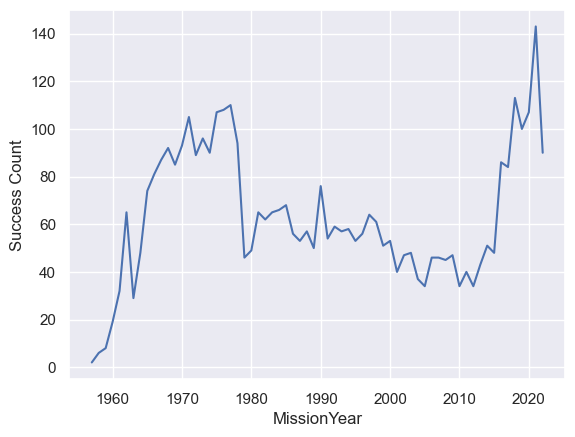

In [50]:
#plotting success count over the year
sns.lineplot(data=missiondf,x='MissionYear',y='Success Count')
plt.grid()

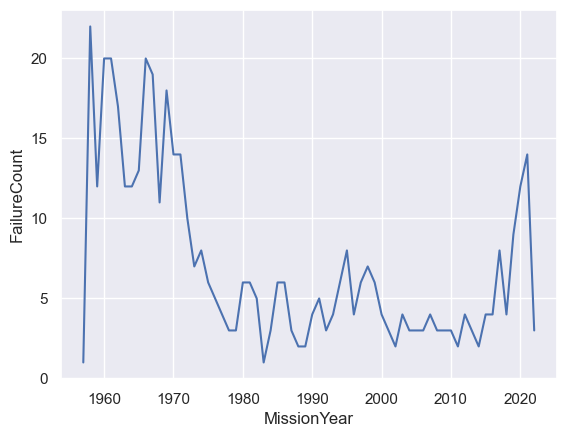

In [90]:
#plotting success count over the year
sns.lineplot(data=missiondf,x='MissionYear',y='FailureCount')
plt.grid()

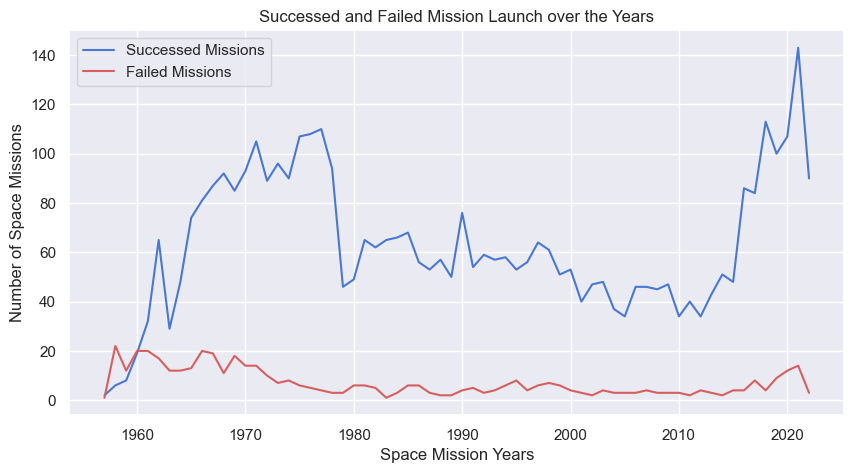

In [100]:
#setting up the figure size of the plot
plt.figure(figsize=(10,5))

#plotting successed mission counts over the year
sns.lineplot(data=missiondf,x='MissionYear',y='Success Count',label="Successed Missions",color='b')

#plotting Failed mission counts over the year
sns.lineplot(data=missiondf,x='MissionYear',y='FailureCount',label="Failed Missions",color='r')

plt.xlabel('Space Mission Years')
plt.ylabel('Number of Space Missions')

#title for the plot
plt.title("Successed and Failed Mission Launch over the Years")

plt.grid()

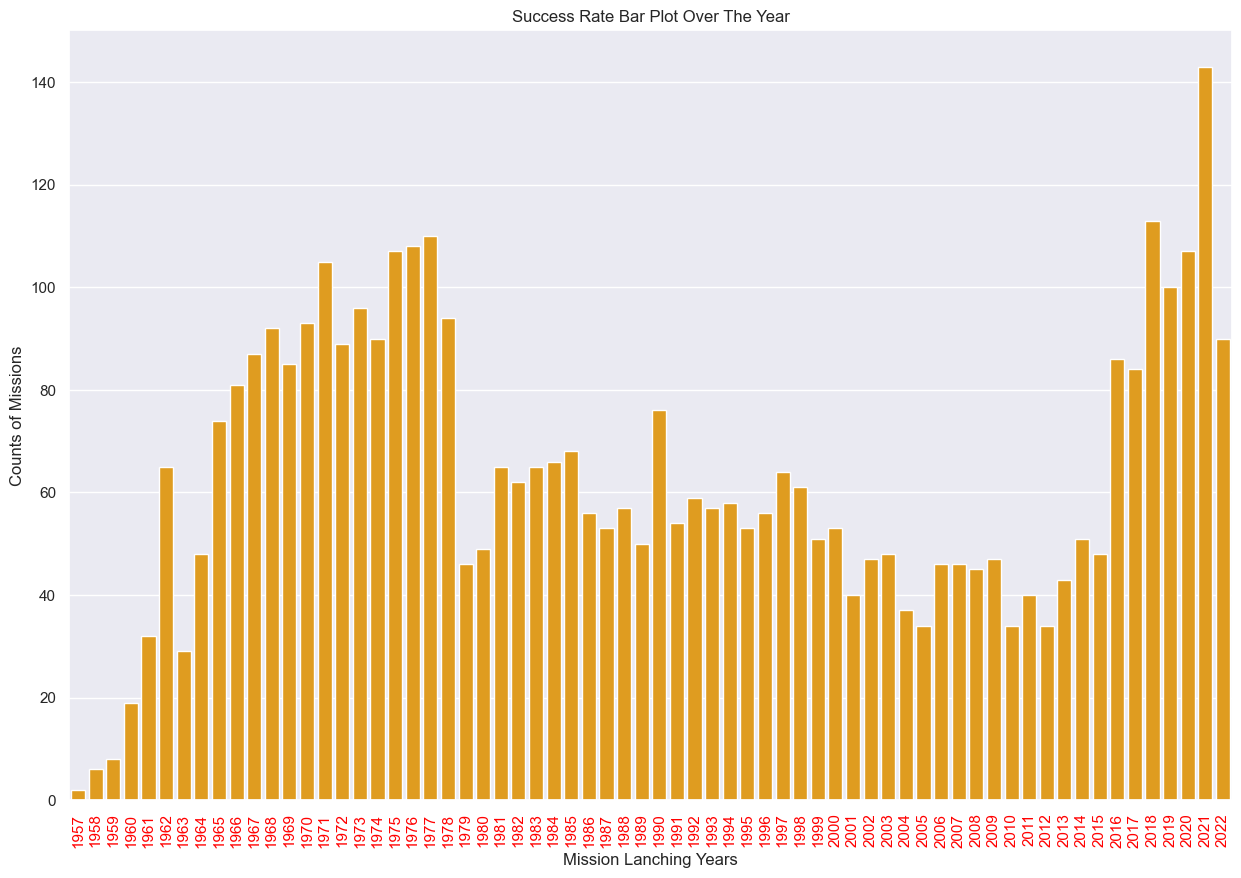

In [102]:
plt.figure(figsize=(15,10))
sns.barplot(data=newdf,x='MissionYear',y='Success Count',color='Orange',legend='auto')
plt.title('Success Rate Bar Plot Over The Year')
plt.xlabel('Mission Lanching Years')
plt.ylabel('Counts of Missions')
plt.xticks(rotation=90,color='Red')
plt.grid(axis='y')
plt.show()

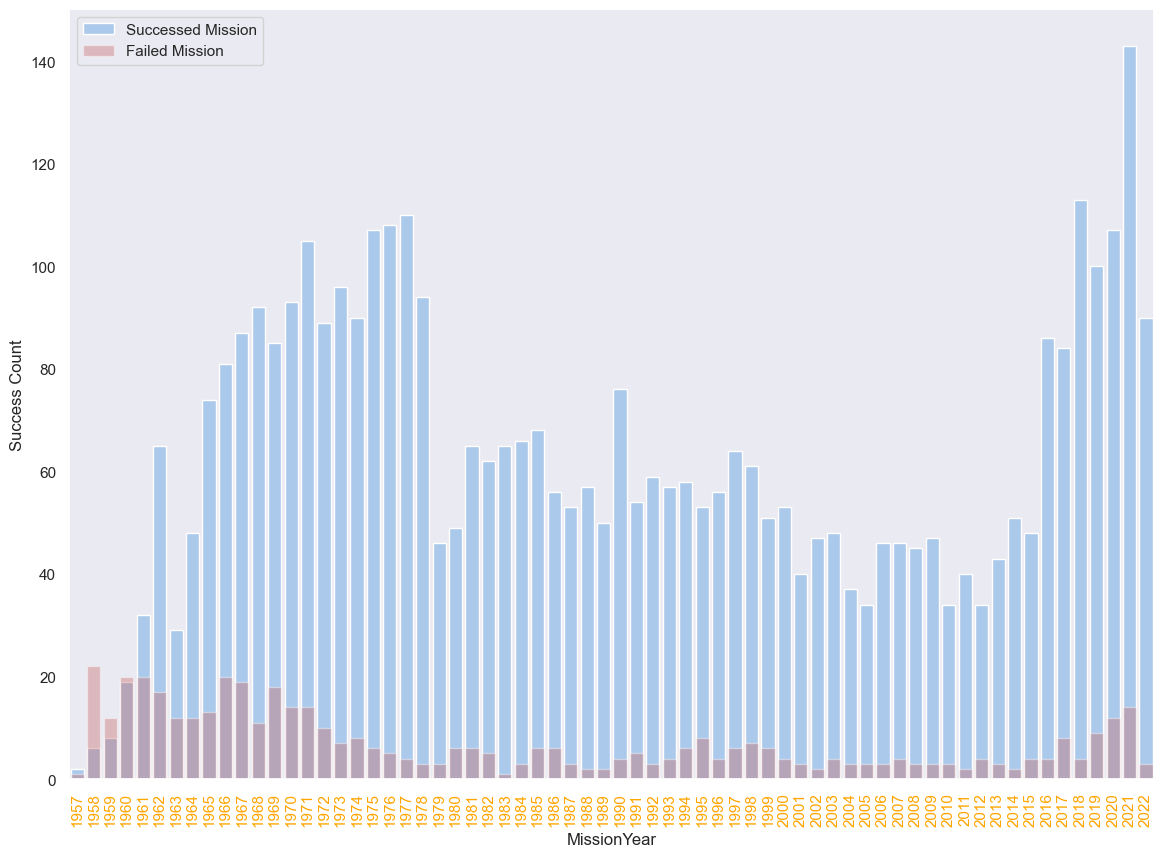

In [89]:
#initializing matplotlib figure
#f,ax = plt.figure(figsize=(6,15))
plt.figure(figsize=(14,10))

#plot the success counts
sns.set_color_codes('pastel')
sns.barplot(data=missiondf,x='MissionYear',y='Success Count',label='Successed Mission',color='b')

#plot the failure mission counts
sns.set_color_codes('muted')
sns.barplot(data=missiondf,x='MissionYear',y='FailureCount',label='Failed Mission',color='r',alpha=0.4)

plt.xticks(rotation=90,color='orange')
plt.show()

#ax.legend9(ncol=2,loc='upper right',frameon=True)
#ax.set()
#sns.despine(left=True,bottom=True)

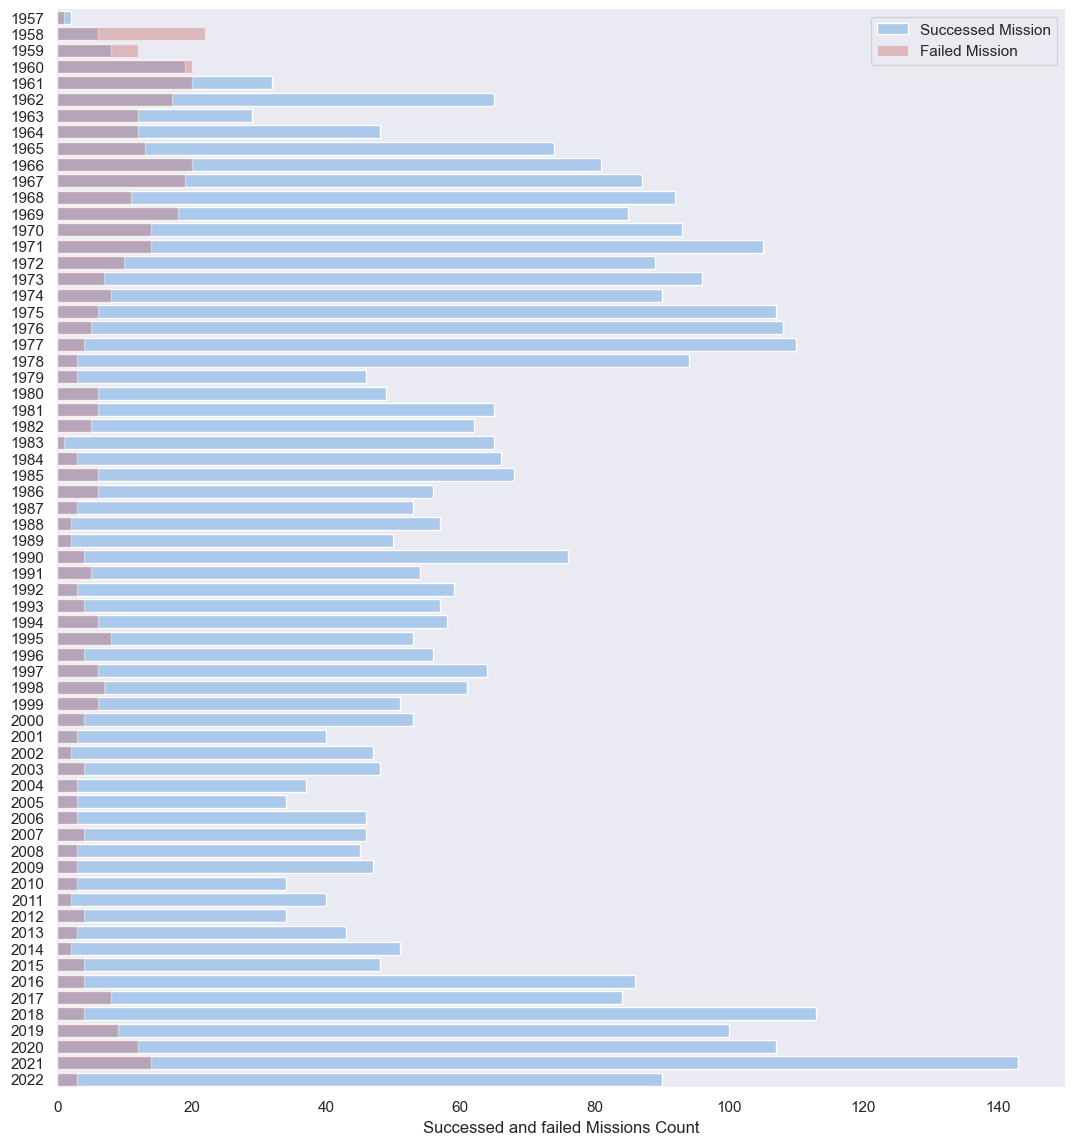

In [87]:
#initializing matplotlib figure
f, ax = plt.subplots(figsize=(13,14))
#plt.figure(figsize=(15,15))

#plot the success counts
sns.set_color_codes('pastel')
sns.barplot(data=missiondf,x='Success Count',y='MissionYear',label='Successed Mission',color='b',orient='h')

#plot the failure mission counts
sns.set_color_codes('muted')
sns.barplot(data=missiondf,x='FailureCount',y='MissionYear',label='Failed Mission',color='r',alpha=0.4,orient='h')

#plt.xticks(rotation=90,color='orange')

ax.legend(ncol=1,loc='upper right',frameon=True)
ax.set(xlim=(0,150),ylabel="",xlabel="Successed and failed Missions Count")
sns.despine(left=True,bottom=True)

# Q.2:Which countries have had the most successful space missions? Has it always been that way?** <a id='5'></a>

In [35]:
successed_country=df[['Location','MissionStatus','MissionYear']]

In [36]:
successed_country.drop(successed_country.loc[successed_country['MissionStatus'] == 'Failure'].index,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8996\1543696070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successed_country.drop(successed_country.loc[successed_country['MissionStatus'] == 'Failure'].index,inplace=True)


In [37]:
successed_country.drop(successed_country[successed_country['MissionStatus'] == 'Partial Failure'].index,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8996\1612368928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successed_country.drop(successed_country[successed_country['MissionStatus'] == 'Partial Failure'].index,inplace=True)


In [38]:
successed_country.drop(successed_country[successed_country['MissionStatus'] == 'Prelaunch Failure'].index,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8996\414852498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successed_country.drop(successed_country[successed_country['MissionStatus'] == 'Prelaunch Failure'].index,inplace=True)


In [39]:
successed_country=successed_country.groupby('Location').value_counts()

In [40]:
successed_country=pd.DataFrame(successed_country)

In [41]:
successed_country.reset_index(inplace=True)

In [48]:
successed_country.value_counts().sum()

1428

In [46]:
successed_country[successed_country['Location'] == 'Blue Origin Launch Site, West Texas, Texas, USA']

,Location,MissionStatus,MissionYear,count
0,"Blue Origin Launch Site, West Texas, Texas, USA",Success,2016,4
1,"Blue Origin Launch Site, West Texas, Texas, USA",Success,2019,3
2,"Blue Origin Launch Site, West Texas, Texas, USA",Success,2015,2
3,"Blue Origin Launch Site, West Texas, Texas, USA",Success,2018,2
4,"Blue Origin Launch Site, West Texas, Texas, USA",Success,2017,1


In [31]:
counts=df['MissionStatus'].value_counts()
counts=pd.DataFrame(counts)
counts

,count
MissionStatus,
Success,4162
Failure,357
Partial Failure,107
Prelaunch Failure,4


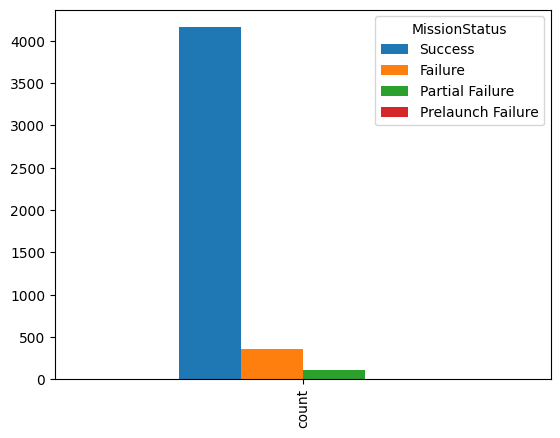

In [32]:
counts.transpose().plot(kind='bar',stacked=False)
plt.show()

In [71]:
success=df.loc[df['Success']].T
success

KeyError: 'Success'

In [75]:
sns.lineplot(df['Date'],hue=df['MissionStatus'],hue_order='sementic')

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Axes: xlabel='MissionStatus'>

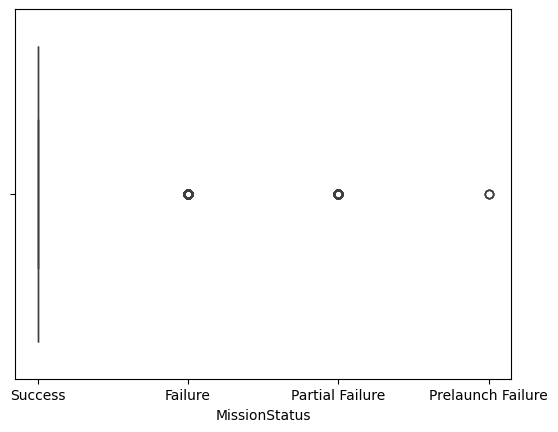

In [86]:
sns.boxplot(data=newdf,x=newdf['MissionStatus'])

In [98]:
newdf['MissionStatus'].value_counts()

MissionStatus
Success              4162
Failure               357
Partial Failure       107
Prelaunch Failure       4
Name: count, dtype: int64